### ARIMA and Seasonal ARIMA 

 - **Auto_integrated Moving Averages.**
 General purpose of the ARIMA.
 - Visualizing the time seris data
 - Make Time Series Data Stationary.
 - Plot the correlation and autocorrelation chart.
 - Construct the arima model or seasonable arima model.
 - Use the model to the predictions.

#### When to use ARIMA :-

AutoRegressive Moving Average(ARIMA) is a statistical model mostly used for time series analysis, to either get a better understanding of data or to predict the future values. ARIMA models are applied in cases where data shows some non-stationarity in it.

#### When to use SARIMA :- 

SARIMA is seasonal ARIMA and it is used with time series with seasonality.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
df = pd.read_csv('champagne.csv',encoding= 'unicode_escape')

In [19]:
df.head()

,Month,Perrin Freres monthly champagne sales millions 64-72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [20]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions 64-72
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [21]:
df.columns = ['Months','Sales']

In [22]:
df.head()

,Months,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [27]:
df.dtypes

Months    object
Sales      int64
dtype: object

In [29]:
df['Months']=pd.to_datetime(df['Months'])

In [30]:
df.head()

,Months,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [31]:
df.set_index(df['Months'],inplace=True)

In [32]:
df.head()

,Months,Sales
Months,,
1964-01-01,1964-01-01,2815
1964-02-01,1964-02-01,2672
1964-03-01,1964-03-01,2755
1964-04-01,1964-04-01,2721
1964-05-01,1964-05-01,2946


In [35]:
del df['Months']

In [36]:
round(df.describe(),1)

,Sales
count,105.0
mean,4761.2
std,2553.5
min,1413.0
25%,3113.0
50%,4217.0
75%,5221.0
max,13916.0


 ## Visualizations.

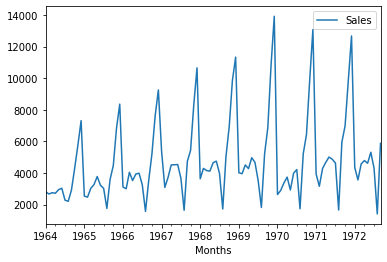

In [38]:
df.plot()
plt.show()

- In the above if we see the line is getting zig-zag and at part of specific portion the graph rasising high.
- If we see for the some period of time the sales get increase and then decsease and then again increase so from we can say - It like seasonal sales sweater mostly sale in winter than the summer.
- WE can say it may stationary.
- If suppose it is not stationary how do we make it as stationary.
- let do it

We can say the stationary wherever the data have standard deviation and mean is constant throghtout seasonablity doesn't exist.

In order make it as stationary we will use the some test.

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
test_result = adfuller(df['Sales'])

Adfuller gives us the five values that are :-

- ADF test stastics,p_values,Lags_used,Number of observations used.

- In this kind of the technique we having the null hypothesis is **Non-Stationary** and Alternate Hypothesis is **Stationary.**

In [46]:
adf_score,pvalue,usedlag,nobs,critical_values,icbest= test_result

In [62]:
print('adf_score :',adf_score)
print('pvalues :',pvalue)
print('Usedlog :-', usedlag)
print('nobs :-',nobs)
print('Critical_values' ,critical_values)
print('icebest :-', icbest )

adf_score : -1.8335930563276228
pvalues : 0.363915771660245
Usedlog :- 11
nobs :- 93
Critical_values {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}
icebest :- 1478.4633060594724


In [53]:
pvalue

0.363915771660245

Since the value of p_value is greater than 0.05 that means our null hypothesis is become True and alternate hypothesis is False.

In [65]:
def is_stationary(p_value):
    if p_value >= 0.05 :
        print('It is accepting  means the null hypothesis and rejecting the alternate hypotheis that means it is non Stationary.')
    else:
        print('It is rejecting the null hypothesis and accepting the alternative hypothesis,that means it is Stationary.')   

In [66]:
is_stationary(pvalue)

It is accepting  means the null hypothesis and rejecting the alternate hypotheis that means it is non Stationary.


## Diffrencing or Integrated.

- We alraedy know that we have not stationary data even though we want the the stationary data.
- So for that we are going use the a diffrencing method with shift.

In [67]:
df['Sales First Diffence'] = df['Sales'] - df['Sales'].shift(1)

In this way we have shifted the record from one isntances in order to do the get the diffrence.

In [68]:
df['Sales First Diffence']

Months
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: Sales First Diffence, Length: 105, dtype: float64

Instead of doing the only one shift,we are suppose to do shift for the 12 beacsue, In the graph we have got the diffrence for the one year that means the 12 months.

In [77]:
df['Seasonal First Diffrenece']= df['Sales']- df['Sales'].shift(12)

In [78]:
df.head(22)

,Sales,Sales First Diffence,Seasonal First Diffrenece
Months,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
1964-06-01,3036,90.0,NaN
1964-07-01,2282,-754.0,NaN
1964-08-01,2212,-70.0,NaN
1964-09-01,2922,710.0,NaN


Again test this seasonal first diffrence with the with adfuller test.

In [81]:
test_data = adfuller(df['Seasonal First Diffrenece'].dropna())

In [84]:
adf_score,P_Value,usedlag,nobs,critical_values,icbest=test_data

In [86]:
is_stationary(P_Value)

It is rejecting the null hypothesis and accepting the alternative hypothesis,that means it is Stationary.


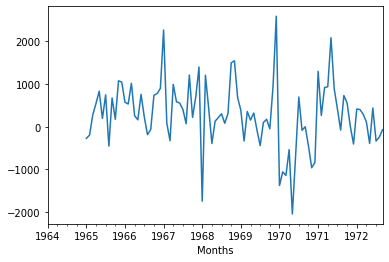

In [88]:
df['Seasonal First Diffrenece'].plot()
plt.show()

Now,the above is looking stationary.

### Auto_Regressive Model.

- Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.

- It is a very simple idea that can result in accurate forecasts on a range of time series problems.

- A regression model, such as linear regression, models an output value based on a linear combination of input values.
- For example:
- **yhat = b0 + b1*X1**

- Where yhat is the prediction, b0 and b1 are coefficients found by optimizing the model on training data, and X is an input value.

- This technique can be used on time series where input variables are taken as observations at previous time steps, called lag variables.

- For example, we can predict the value for the next time step (t+1) given the observations at the last two time steps (t-1 and t-2). As a regression model, this would look as follows:

- **X(t+1) = b0 + b1*X(t-1) + b2*X(t-2)**
- Here we can see the t-1,t-2 are the  lags which are helping in determing the previous to date to next date prediction.

- Because the regression model uses data from the same input variable at previous time steps, it is referred to as an autoregression (regression of self).

- If i suppose to get the prediction of today for that that how much previous time,date required to get today prediction .
- For that we need the **Autocorrelation.**

# Auto-Correlation.

- An autoregression model makes an assumption that the observations at previous time steps are useful to predict the value at the next time step.

- This relationship between variables is called correlation.

- If both variables change in the same direction (e.g. go up together or down together), this is called a positive correlation. If the variables move in opposite directions as values change (e.g. one goes up and one goes down), then this is called negative correlation.

- We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various different lags. The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling.

- Again, because the correlation is calculated between the variable and itself at previous time steps, it is called an autocorrelation. It is also called serial correlation because of the sequenced structure of time series data.

- The correlation statistics can also help to choose which lag variables will be useful in a model and which will not.

- Interestingly, if all lag variables show low or no correlation with the output variable, then it suggests that the time series problem may not be predictable. This can be very useful when getting started on a new dataset.

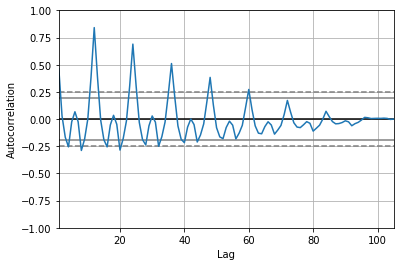

In [90]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

- We can plot the observation at the previous time step (t-1) with the observation at the next time step (t+1) as a scatter plot.

- This could be done manually by first creating a lag version of the time series dataset and using a built-in scatter plot function in the Pandas library.

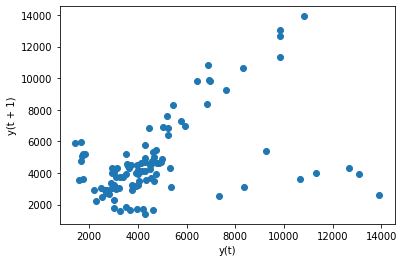

In [92]:
from pandas.plotting import lag_plot
lag_plot(df['Sales'])
plt.show()

## Autocorrelation and Partial Correlation.

- Identification of AR model is often done by with PACF.

 - for an AR model the therotical PACF 'stuff off' past the orders of the model.The phrase 'Shut off' means that in theory the partial auto correlations are equal to 0 beyond that point.Put the another way,the number of number of non-zero partial autocorrelation gives order of the AR model.By the 'Order of the model' we mean the most extreme lag of x that is use as a predictor.
 
- Identification of MA model often best done with the ACF rather than PACF.

 - For a MA model,the theriotical PACF does not shut off but instaed tapers towards zero in the same manner.A clearer pattern for a MA model is in the ACF.The ACF will have non-zero autocorrelations only at lags involved in the model.

- We are using the values in the AR model that are the :-
 - AR model lags 
 - Diffrencing and Integrating
 - Moving average lags.

- In this case,mainly focus on the AR model ,Basically we are seraching those value of lag which giving us the expential decrement.
- In the Partial Auto-Correlation we are finding that after the zero there is only one 1th lag which is providing us the exponential decrement in the Partial Auto-correlation graph.
- In the other lags after 1th lag there is no any exponential behaviour of the graph avalible.


In [93]:
from statsmodels.graphics.tsa.plots import acf,pacf,plot_acf,plot_pacf

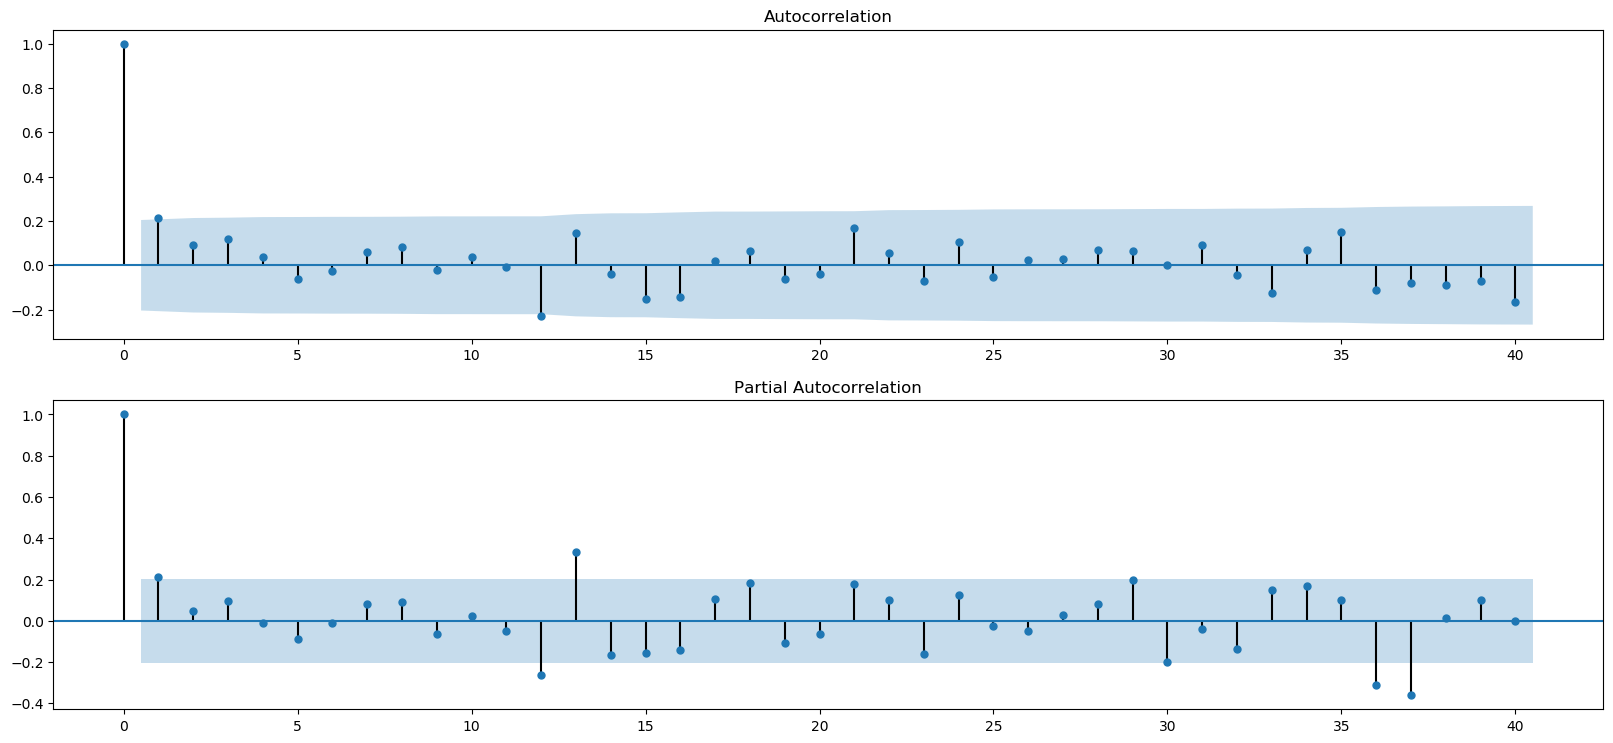

In [100]:
figure = plt.figure(figsize=(20,9),dpi=100)
ax1 = plt.subplot(211)
fig=plot_acf(df['Seasonal First Diffrenece'].iloc[13:],lags=40,ax=ax1)
ax2 = plt.subplot(212)
fig=plot_pacf(df['Seasonal First Diffrenece'].iloc[13:],lags=40,ax=ax2)

From the above case we are just considering the only and only one in both case we can zero as well.

- For the non-seasonal data.

 - AR model lags    p= 1   depends upon PAC exponetial decrement happened upto that lag.
 - Diffrencing and Integrating, d = 1 Only one deffrencing have done so d = 1
 - Moving average lags. r = 0 or 1 and according the AC

# Seasonal data 
- So we dont want data over here.

In [101]:
from statsmodels.tsa.arima_model import ARIMA  #This seasonal data.

In [102]:
model = ARIMA(df['Sales'],order=(1,1,1))
model_fit = model.fit()

In [103]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Fri, 26 Jun 2020   AIC                           1910.251
Time:                        22:59:42   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7833     12.405      1.837      0.069      -1.531      47.097
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

# Stationary data.

In [104]:
import statsmodels.api as sm

In [126]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()

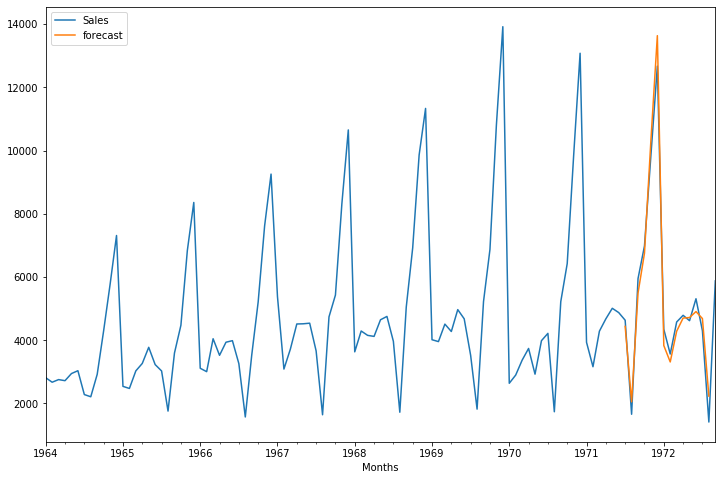

In [106]:
df['forecast'] = results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))
plt.show()

In [107]:
from pandas.tseries.offsets import DateOffset

In [109]:
future_dates = [df.index[-1]+ DateOffset(months=x) for x in range(0,24)]
# Taken the last index of the dataframe df and add the dataoffset on this 24 moths 

In [120]:
future_datasets = pd.DataFrame(columns=df.columns,index=future_dates[1:])

In [122]:
future_datasets.tail()

,Sales,Sales First Diffence,Seasonal First Diffrenece,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [123]:
future_df = pd.concat([df,future_datasets])

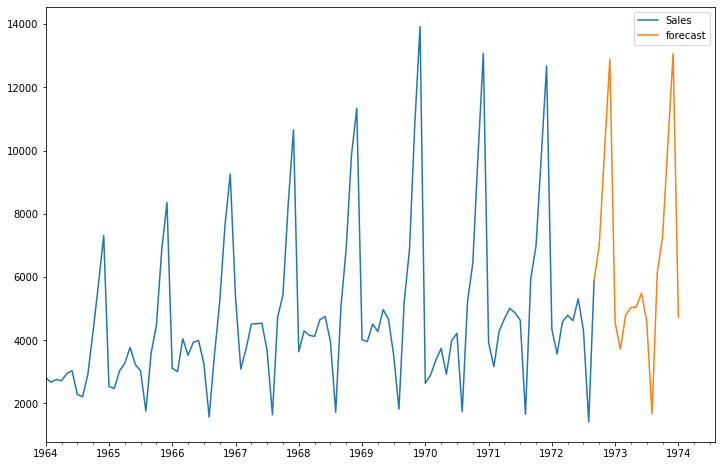

In [125]:
future_df['forecast'] = results.predict(start=104,end=120,dynamic=True)
future_df[['Sales','forecast']].plot(figsize=(12,8))
plt.show()